In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [2]:
data_dir = 'C:/Users/tyler/Desktop/flowers'
class_names = []
for file in os.listdir(data_dir):
    file = file.split('_')[0].lower()
    if file not in class_names:
        class_names.append(file)
# class_names = list(set(class_names))

image_count = len([name for name in os.listdir(data_dir)])

# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

batch_size = 32
img_height = 175
img_width = 175
nb_epochs = 8

In [3]:
datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2) # set validation split

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 23676 images belonging to 14 classes.
Found 5911 images belonging to 14 classes.


In [4]:
model_path = 'C:/Users/tyler/Documents/GitHub/sf20_ds17/students_submissions/ty-adams/Project 5'
file_name = 'saved_model.pb'
new_model = tf.keras.models.load_model(model_path)

In [6]:
# image_batch, label_batch = [], []
# for i in range(8248+1):
#     image, label = next(validation_generator)
#     image_batch.append(image)
#     label_batch.append(label)

In [9]:
# loss, acc = new_model.evaluate(image_batch,  label_batch, verbose=2)
# print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

# print(new_model.predict(image_batch).shape)

In [10]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, int(true_label[i]), img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.yticks([])
    thisplot = plt.bar(range(45), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

NameError: name 'result' is not defined

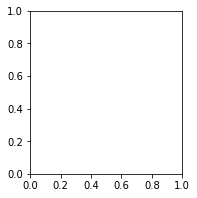

In [11]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
# class_num = int(label_batch[i])
plot_image(i, result[i], label_batch, image_batch)
plt.subplot(1,2,2)
plot_value_array(i, result[i],  label_batch)
plt.show()

In [ ]:
classes=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]
y_pred=new_model.predict_classes(image_batch)
con_mat = tf.math.confusion_matrix(labels=label_batch, predictions=y_pred).numpy()
# Normalization Confusion Matrix to the interpretation of which class is being misclassified.

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)
con_mat_df